### BUD4 growth rate count final repeat (randomized stage positions) 

In [2]:
import numpy as np
import scipy as sp
from scipy.stats import norm
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import statsmodels.api as sm
import pylab 

import os

import warnings 

warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
cd /Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Data/eEMC007/counts_new/

/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Data/eEMC007/counts_new


In [4]:
files=os.listdir('.')

In [5]:
csv_files=[]
ids=[]
for f in files:
    if ('Dap_counts.csv' in f):
        get_id=f[4:f.index('_')]
        ids.append(int(get_id))
        csv_files.append(f)


file_names=pd.DataFrame({'ID':ids,'FileName':csv_files}).sort_values('ID',ascending=True)


In [6]:
file_names['Set']=file_names['ID'].apply(lambda x:int((x-13)/49)+1)

In [7]:
arr_mean=np.zeros(shape=(16,1))
# arr_mean=np.zeros(shape=(16,1))

for k in range(0,16):
    mas=pd.Series()
    sub_ds=file_names.loc[file_names['Set']==(k+1),'FileName']
    for f in sub_ds:
        d=pd.read_csv(f)['counts']
        # print(f,"\t",d.count())
        mas=pd.concat([mas,d])
        # print(sum())
        mas[mas>0].to_csv('counts_'+str(k+1)+'.csv')
    arr_mean[k,:]=mas[mas>0].mean()
arr_mean_f=arr_mean.transpose()[0]

In [8]:
mean_counts=pd.DataFrame()
mean_counts['D2']=[arr_mean_f[0],arr_mean_f[1],arr_mean_f[2],np.nan]
mean_counts['D02']=[arr_mean_f[3],arr_mean_f[4],arr_mean_f[5],arr_mean_f[6]]
mean_counts['D005']=[arr_mean_f[8],arr_mean_f[9],arr_mean_f[10],arr_mean_f[11]]
mean_counts['D0025']=[arr_mean_f[12],arr_mean_f[13],arr_mean_f[14],arr_mean_f[15]]

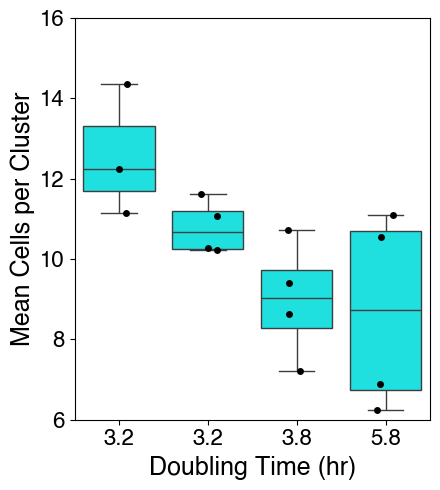

In [9]:
plt.rc('font',family='helvetica')
plt.figure(figsize=(4.5,5))

dt=np.round([3.18,3.18,3.8,5.8],1)
dt_labels=[str(d) for d in dt]

sns.boxplot(data=mean_counts,color='cyan')
sns.stripplot(data=mean_counts,color='black',size=5)

plt.ylim(6,16)
plt.xticks([0,1,2,3],dt_labels,fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'Doubling Time (hr)',fontsize=18)
plt.ylabel('Mean Cells per Cluster',fontsize=18)
plt.tight_layout()
plt.savefig('/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Figures/Final/bud4p_doubling_time_effect.jpg',dpi=600)

In [10]:
stats.mannwhitneyu(mean_counts['D2'].dropna(),mean_counts['D02'].dropna(),alternative='greater')

MannwhitneyuResult(statistic=11.0, pvalue=0.05714285714285714)

In [11]:
stats.mannwhitneyu(mean_counts['D2'].dropna(),mean_counts['D005'].dropna(),alternative='greater')

MannwhitneyuResult(statistic=12.0, pvalue=0.02857142857142857)

In [12]:
stats.mannwhitneyu(mean_counts['D2'].dropna(),mean_counts['D0025'].dropna(),alternative='greater')

MannwhitneyuResult(statistic=12.0, pvalue=0.02857142857142857)